In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#construire une base de données à partir des fichiers excel
df_btc = pd.read_csv('BTC-USD.csv')#BITCOIN
df_bnb = pd.read_csv('BNB-USD.csv')#BINANCE COIN
df_ada = pd.read_csv('ADA-USD.csv')#CARDANO
df_eth = pd.read_csv('ETH-USD.csv')#ETHERIUM
df_doge = pd.read_csv('DOGE-USD.csv')#DOGE COIN

#print(df.to_string())


In [2]:
#supprimer les champs vides
df_btc.dropna(inplace=True)
df_bnb.dropna(inplace=True)
df_ada.dropna(inplace=True)
df_eth.dropna(inplace=True)
df_doge.dropna(inplace=True)

#conversion du type date

df_btc['Date'] = pd.to_datetime(df_btc['Date'],dayfirst=True)
df_bnb['Date'] = pd.to_datetime(df_bnb['Date'],dayfirst=True)
df_ada['Date'] = pd.to_datetime(df_ada['Date'],dayfirst=True)
df_eth['Date'] = pd.to_datetime(df_eth['Date'],dayfirst=True)
df_doge['Date'] = pd.to_datetime(df_doge['Date'],dayfirst=True)

# alléger la base de données
# BTC
df_btc = df_btc[['Date','Open','Close']]
df_btc = df_btc.rename(columns = {'Open': 'Open BTC', 'Close': 'Close BTC'})
# BNB
df_bnb = df_bnb[['Date','Open','Close']]
df_bnb = df_bnb.rename(columns = {'Open': 'Open BNB', 'Close': 'Close BNB'})
# ADA
df_ada = df_ada[['Date','Open','Close']]
df_ada = df_ada.rename(columns = {'Open': 'Open ADA', 'Close': 'Close ADA'})
#ETH
df_eth = df_eth[['Date','Open','Close']]
df_eth = df_eth.rename(columns = {'Open': 'Open ETH', 'Close': 'Close ETH'})
# DOGE
df_doge = df_doge[['Date','Open','Close']]
df_doge = df_doge.rename(columns = {'Open': 'Open DOGE', 'Close': 'Close DOGE'})


In [3]:
#jointure des données
df_crypto = df_btc.join(df_eth.set_index('Date'), on='Date')
df_crypto = df_crypto.join(df_bnb.set_index('Date'), on='Date')
df_crypto = df_crypto.join(df_ada.set_index('Date'), on='Date')
df_crypto = df_crypto.join(df_doge.set_index('Date'), on='Date')


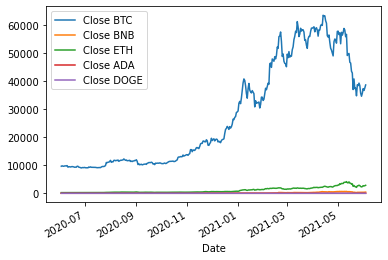

In [4]:
#tracer des courbes qui illustrent l'évolution de certain cryptomonnaies 
ax = plt.gca()

df_crypto.plot(x = 'Date', y = 'Close BTC',ax=ax)
df_crypto.plot(x = 'Date', y = 'Close BNB',ax=ax)
df_crypto.plot(x = 'Date', y = 'Close ETH',ax=ax)
df_crypto.plot(x = 'Date', y = 'Close ADA',ax=ax)
df_crypto.plot(x = 'Date', y = 'Close DOGE',ax=ax)
plt.show()

In [5]:
!pip install bar-chart-race

In [6]:
import bar_chart_race as bcr

new_df_crypto = df_crypto[['Date','Close BTC', 'Close ETH', 'Close BNB', 'Close ADA', 'Close DOGE']]
new_df_crypto = new_df_crypto.rename(columns = {'Close BTC': 'BTC', 'Close ETH': 'ETH', 'Close BNB':'BNB', 'Close ADA':'ADA', 'Close DOGE':'DOGE'})
# respecter la forme du dataframe définie par bar_chart_race
# mettre la colonne date en index 
new_df_crypto.set_index('Date', inplace = True)
# supprimer le nom de l'index
new_df_crypto.index.name=None
df_crypto1 = new_df_crypto[['BTC', 'ETH']]
df_crypto2 = new_df_crypto[['BNB', 'ADA', 'DOGE']]

In [7]:
# en cas d'erreur installer ffmpeg avec la ligne de commande  
# conda install -c conda-forge ffmpeg
bcr.bar_chart_race(
    df=new_df_crypto,
    filename='anime.mp4',
    title='Evolution de 5 cryptomonnaies entre 06/2020 et 06/2021'
)

In [8]:
#étudier la corrélation entre les cryptomonnaies
new_df_crypto.corr()

,BTC,ETH,BNB,ADA,DOGE
BTC,1.000000,0.877198,0.820276,0.867936,0.562020
ETH,0.877198,1.000000,0.926539,0.948780,0.861200
BNB,0.820276,0.926539,1.000000,0.919127,0.856662
ADA,0.867936,0.948780,0.919127,1.000000,0.804731
DOGE,0.562020,0.861200,0.856662,0.804731,1.000000


In [228]:
!pip install pandas_alive

In [248]:
import pandas_alive

new_df_crypto.plot_animated(kind='line',filename="animation1.mp4",title="Evolution Over Time")



Generating LineChart, plotting ['BTC', 'ETH']


C:\Users\moi\anaconda3\lib\site-packages\pandas_alive\charts.py:516: UserWarning: Discarding nonzero nanoseconds in conversion
  super().set_x_y_limits(self.df, i, self.ax)


Generating LineChart, plotting ['BNB', 'ADA', 'DOGE']


C:\Users\moi\anaconda3\lib\site-packages\pandas_alive\charts.py:516: UserWarning: Discarding nonzero nanoseconds in conversion
  super().set_x_y_limits(self.df, i, self.ax)


LineChart(df=                                      BNB       ADA      DOGE
index                                                        
2020-06-03 00:00:00.000000000   17.545404  0.085439  0.002583
2020-06-03 04:50:23.204419889   17.549498  0.086151  0.002593
2020-06-03 09:40:46.408839779   17.553592  0.086863  0.002602
2020-06-03 14:31:09.613259668   17.557686  0.087576  0.002612
2020-06-03 19:21:32.817679558   17.561780  0.088288  0.002621
...                                   ...       ...       ...
2021-06-02 04:38:27.182320440  406.571448  1.770353  0.418692
2021-06-02 09:28:50.386740332  411.880566  1.787883  0.414010
2021-06-02 14:19:13.591160220  417.189685  1.805412  0.409327
2021-06-02 19:09:36.795580108  422.498803  1.822942  0.404645
2021-06-03 00:00:00.000000000  427.807922  1.840471  0.399963

[1811 rows x 3 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%d/%m/%Y', figsize=array([6.5, 3.5]), title='Evolution Over Time', fig=<Figure 

In [29]:
import pandas as pd
import datetime, time
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from pylab import *
from matplotlib.artist import Artist
import matplotlib.pyplot as plt
import matplotlib.animation as animation


#construire une base de données à partir des fichiers excel
df_btc = pd.read_csv('BTC-USD.csv')#BITCOIN
#supprimer les champs vides
df_btc.dropna(inplace=True)
#conversion du type date
df_btc['Date'] = pd.to_datetime(df_btc['Date'],dayfirst=True)
# BTC
df_btc = df_btc[['Date','Open','Close']]


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig, ax = plt.subplots(constrained_layout=True)
# 
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

x = df_btc['Date'].tolist()
y = df_btc['Close'].values.tolist()

z,w=[x[0]], [y[0]]
p1,p2=[], []
mn,d=[y[0]],[x[0]]
index,p=0,0.0
index_max,mx=0,y[0]
ims = []

#for i in range(len(x)):
 #   x[i]=x[i].strftime("%d-%m-%Y")

txt=plt.text(x[0],y[0],str(y[0]))

for i in range(1,10):
    
    Artist.remove(txt)#remove texte
    z.append((x[i]))#ajouter un élément à la fin de z
    w.append((y[i]))
    
    #ims.append(plt.plot()) #tracer w en foction de z
    
    for j in range(i):
        if w[j-1]>w[j]:
            p=w[j]
            index=j
            mx=w[j-1]
            index_max=j-1
    
    mn.append(p)
    d.append(x[index])
    txt=plt.text(z[i],w[i],str(w[i]))#ajouter du texte
   
    ims.append(plt.plot(z, w,'b--',d, mn,'r--'))
    plt.pause(0.01) # pause avec duree en secondes

im_ani = animation.ArtistAnimation(fig, ims, interval=10, repeat=True,blit=True)

im_ani.save('im.mp4', writer=writer)   


#plt.show()


#def animate(i):
#    z.append(x[i])
#   w.append((y[i]))
 #   plt.plot(z,w, color="red")
    
    
    
#anim = FuncAnimation(fig, animate, interval=100)
#anim.save('lines.mp4', fps=15)